In [44]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])
import numpy as np

In [45]:
# Read in Revenue Files
file_2006 = "../../datasets/subsets/revenue/rev_2006.csv"

rev_2006 = pd.read_csv(file_2006)
rev_2006 = rev_2006.set_index(['STNAME'])
rev_2006

,2006_R1A,2006_R1B,2006_R1C,2006_R1D,2006_R1E,2006_R1F,2006_R1G,2006_R1H,2006_R1I,2006_R1J,...,2006_R1L,2006_R1M,2006_R1N,2006_R2,2006_R3,2006_R4A,2006_R4B,2006_R4C,2006_R4D,2006_R5
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,NaN,NaN,8.377226e+08,5.074214e+08,3563199.0,9.029800e+05,NaN,86597.0,8.015377e+07,129652208,...,2.335454e+08,1945426.0,NaN,84058553.0,3.547078e+09,18646756.0,722134379,320732.0,17738068.0,5.809597e+08
alaska,NaN,NaN,1.693089e+08,1.808350e+08,NaN,NaN,NaN,NaN,1.198848e+07,12186450,...,3.496444e+07,NaN,NaN,NaN,1.005181e+09,45529754.0,137031654,2109687.0,106521415.0,NaN
arizona,2.610583e+09,NaN,NaN,4.096064e+07,580878.0,2.165609e+07,129949.0,403161.0,5.936601e+07,117771588,...,3.809437e+08,877800.0,6064136.0,204055366.0,4.272320e+09,18931770.0,835576202,596874.0,185144404.0,6.652259e+08
arkansas,1.094994e+09,1.245972e+06,1.520969e+06,7.920480e+05,4678927.0,2.982173e+06,60826.0,135367.0,4.594938e+07,54430437,...,7.339600e+07,46094.0,392402.0,3773441.0,2.432920e+09,29364086.0,455589818,104272.0,41798.0,2.480611e+08
california,1.387562e+10,4.500919e+08,1.684000e+05,NaN,199551.0,2.169627e+08,23243683.0,36124922.0,1.056239e+09,573634361,...,3.069683e+09,NaN,NaN,NaN,3.784708e+10,399317041.0,6256207122,21089540.0,213299345.0,9.846494e+09
colorado,2.828140e+09,7.144579e+07,NaN,NaN,47598986.0,5.266907e+06,5184240.0,111686.0,1.069300e+08,94630866,...,3.273218e+08,2950071.0,3460933.0,19398046.0,3.089571e+09,54407135.0,466552838,NaN,10010277.0,6.122610e+08
connecticut,NaN,NaN,4.771725e+09,NaN,3053979.0,1.606357e+08,NaN,9311737.0,1.146385e+06,126561878,...,3.950161e+07,NaN,551496.0,NaN,3.351644e+09,41257086.0,360438755,NaN,15933361.0,7.502264e+08
delaware,3.554488e+08,NaN,NaN,NaN,NaN,4.738548e+07,NaN,NaN,9.687604e+06,16674931,...,5.398194e+07,NaN,NaN,NaN,9.698542e+08,NaN,125194405,NaN,1745666.0,1.938143e+08
district of columbia,NaN,NaN,2.281680e+08,8.157731e+08,557725.0,NaN,233388.0,NaN,4.562400e+04,988870,...,NaN,719954.0,218977.0,NaN,NaN,384278.0,125898200,18942952.0,1472874.0,NaN


In [46]:
(rev_2006.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california    73.885453
new york      47.683888
texas         44.481786
florida       28.024978
illinois      25.430573
dtype: float64

In [47]:
summary_2006 = pd.DataFrame(rev_2006.sum(axis=1)/1000000000, columns=['Total Revenue ($B)'])
summary_2006['Local Revenue ($B)'] = rev_2006.iloc[:,0:14].sum(axis=1)/1000000000
summary_2006['State Revenue ($B)'] = rev_2006.iloc[:,15:16].sum(axis=1)/1000000000
summary_2006['Federal Revenue ($B)'] = rev_2006.iloc[:,16:20].sum(axis=1)/1000000000
summary_2006['Other Revenue ($B)'] = (rev_2006.iloc[:,14:15].sum(axis=1) + rev_2006.iloc[:,20:21].sum(axis=1))/1000000000
summary_2006

,Total Revenue ($B),Local Revenue ($B),State Revenue ($B),Federal Revenue ($B),Other Revenue ($B)
STNAME,,,,,
alabama,6.927982,1.957046,3.547078,0.758840,0.665018
alaska,1.712601,0.416227,1.005181,0.291193,0.000000
arizona,9.520806,3.338955,4.272320,1.040249,0.869281
arkansas,4.533685,1.363831,2.432920,0.485100,0.251834
california,73.885453,19.301968,37.847078,6.889913,9.846494
colorado,7.887115,3.634914,3.089571,0.530970,0.631659
connecticut,9.631988,5.112488,3.351644,0.417629,0.750226
delaware,1.774598,0.483990,0.969854,0.126940,0.193814
district of columbia,1.201091,1.054392,0.000000,0.146698,0.000000


In [48]:
summary_pct = pd.DataFrame(summary_2006['Local Revenue ($B)'] / summary_2006['Total Revenue ($B)'] *100, columns = ['Local Rev (%)'])
summary_pct['State Rev (%)'] = summary_2006['State Revenue ($B)'] / summary_2006['Total Revenue ($B)'] *100
summary_pct['Federal Rev (%)'] = summary_2006['Federal Revenue ($B)'] / summary_2006['Total Revenue ($B)'] *100
summary_pct['Other Rev (%)'] = summary_2006['Other Revenue ($B)'] / summary_2006['Total Revenue ($B)'] *100
summary_pct

,Local Rev (%),State Rev (%),Federal Rev (%),Other Rev (%)
STNAME,,,,
alabama,28.248423,51.199298,10.953261,9.599018
alaska,24.303803,58.693258,17.002939,0.000000
arizona,35.070089,44.873514,10.926063,9.130334
arkansas,30.082167,53.663186,10.699905,5.554742
california,26.124179,51.223992,9.325128,13.326702
colorado,46.086740,39.172391,6.732123,8.008747
connecticut,53.078226,34.797011,4.335857,7.788906
delaware,27.273202,54.652038,7.153172,10.921588
district of columbia,87.786243,0.000000,12.213757,0.000000


In [49]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2006.csv"

success_2006 = pd.read_csv(dropout_path)
success_2006

,STNAME,2006_DRP912,2006_DRP9,2006_DRP10,2006_DRP11,2006_DRP12,2006_DRPAM,2006_DRPAS,2006_DRPHI,2006_DRPBL,2006_DRPWH
0,alabama,2.5,1.9,2.6,2.8,2.9,1.3,1.2,2.9,2.9,2.3
1,alaska,8.0,4.8,7.5,8.9,11.3,11.7,6.9,9.7,10.0,6.2
2,arizona,7.6,4.9,6.0,8.0,13.0,NaN,4.4,9.3,8.1,NaN
3,arkansas,3.1,1.8,3.0,4.1,3.9,2.5,2.4,3.8,4.2,2.7
4,california,3.7,2.3,2.3,3.0,8.1,4.4,1.8,4.8,6.5,2.3
5,colorado,7.8,5.7,7.4,8.5,10.1,13.5,4.8,15.8,12.5,4.7
6,connecticut,2.0,1.9,1.9,2.3,1.9,2.3,0.7,4.6,2.8,1.3
7,delaware,5.5,6.5,5.7,5.3,4.0,6.8,2.9,9.8,7.3,4.2
8,district of columbia,NaN,NaN,NaN,NaN,NaN,NaN,7.4,NaN,NaN,4.0
9,florida,4.1,3.7,3.7,4.2,4.9,3.7,1.7,5.0,5.8,2.9


In [50]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_pct['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Local Rev (%),State Rev (%),Federal Rev (%),Other Rev (%),Dropout Rate
STNAME,,,,,
alabama,28.248423,51.199298,10.953261,9.599018,2.5
alaska,24.303803,58.693258,17.002939,0.000000,8
arizona,35.070089,44.873514,10.926063,9.130334,7.6
arkansas,30.082167,53.663186,10.699905,5.554742,3.1
california,26.124179,51.223992,9.325128,13.326702,3.7
colorado,46.086740,39.172391,6.732123,8.008747,7.8
connecticut,53.078226,34.797011,4.335857,7.788906,2
delaware,27.273202,54.652038,7.153172,10.921588,5.5
district of columbia,87.786243,0.000000,12.213757,0.000000,NaN


In [51]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Local Rev (%),State Rev (%),Federal Rev (%),Other Rev (%),Dropout Rate
STNAME,,,,,
louisiana,32.044575,36.449774,15.539090,15.966561,8.4
alaska,24.303803,58.693258,17.002939,0.000000,8
colorado,46.086740,39.172391,6.732123,8.008747,7.8
nevada,54.672658,21.180503,5.826992,18.319848,7.7
arizona,35.070089,44.873514,10.926063,9.130334,7.6
wyoming,33.992679,42.605852,9.770296,13.631173,5.7
washington,26.536615,52.040696,7.699814,13.722876,5.6
delaware,27.273202,54.652038,7.153172,10.921588,5.5
new mexico,13.659886,67.858490,13.818615,4.663009,5.5


In [52]:
summary_2006['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_2006['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    

summary_2006 = summary_2006[summary_2006['Dropout Rate'].notna()]
summary_2006['Dropout Rate'] = summary_2006['Dropout Rate'].astype(float)
summary_2006.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, alabama to wyoming
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total Revenue ($B)    47 non-null     float64
 1   Local Revenue ($B)    47 non-null     float64
 2   State Revenue ($B)    47 non-null     float64
 3   Federal Revenue ($B)  47 non-null     float64
 4   Other Revenue ($B)    47 non-null     float64
 5   Dropout Rate          47 non-null     float64
dtypes: float64(6)
memory usage: 2.6+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


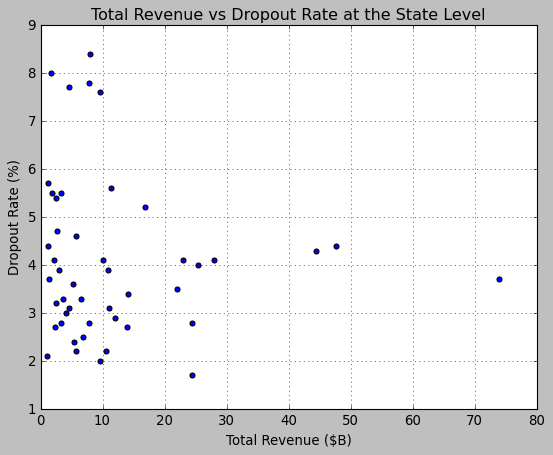

In [53]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2006['Total Revenue ($B)'], summary_2006['Dropout Rate'])
plt.xlabel('Total Revenue ($B)')
plt.xlim(left = 0, right = 80)
plt.ylabel('Dropout Rate (%)')
plt.title("Total Revenue vs Dropout Rate at the State Level")
plt.grid()

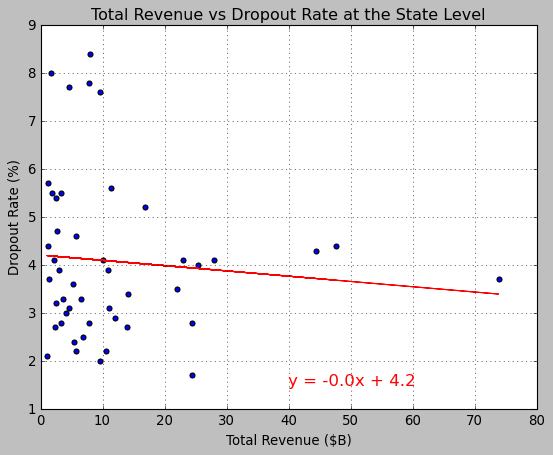

The correlation between both factors is -0.0921


In [54]:
# Total Revenue vs Dropout Rate
x_values = summary_2006['Total Revenue ($B)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Revenue ($B)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Revenue vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 80)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

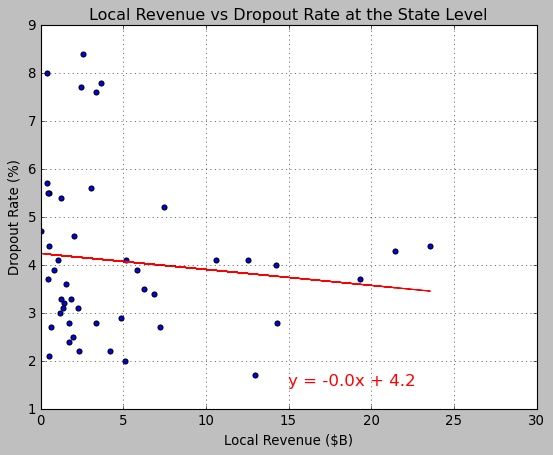

The correlation between both factors is -0.1152


In [55]:
# Local Revenue vs Dropout Rate
x_values = summary_2006['Local Revenue ($B)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,1.5),fontsize=15,color="red")
plt.xlabel('Local Revenue ($B)')
plt.ylabel('Dropout Rate (%)')
plt.title('Local Revenue vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 30)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

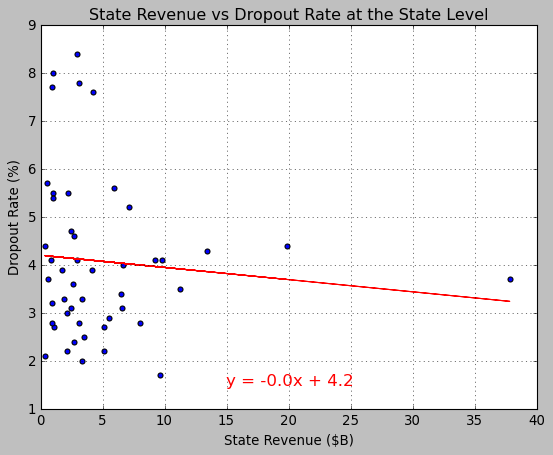

The correlation between both factors is -0.0949


In [56]:
# State Revenue vs Dropout Rate
x_values = summary_2006['State Revenue ($B)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,1.5),fontsize=15,color="red")
plt.xlabel('State Revenue ($B)')
plt.ylabel('Dropout Rate (%)')
plt.title('State Revenue vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 40)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

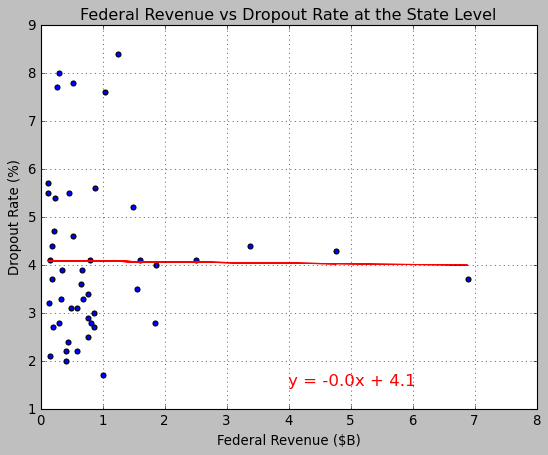

The correlation between both factors is -0.0101


In [57]:
# Federal Revenue vs Dropout Rate
x_values = summary_2006['Federal Revenue ($B)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,1.5),fontsize=15,color="red")
plt.xlabel('Federal Revenue ($B)')
plt.ylabel('Dropout Rate (%)')
plt.title('Federal Revenue vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 8)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

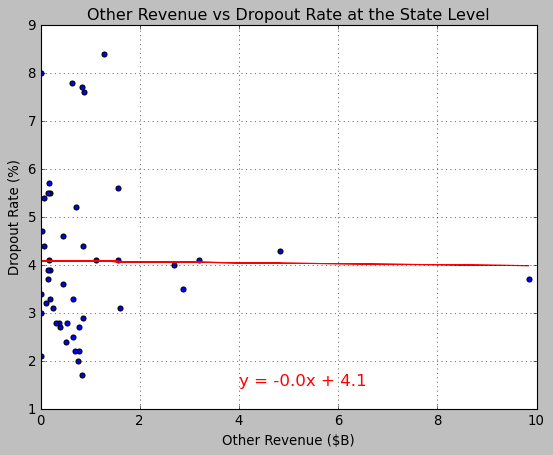

The correlation between both factors is -0.01


In [58]:
# Other Revenue vs Dropout Rate
x_values = summary_2006['Other Revenue ($B)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,1.5),fontsize=15,color="red")
plt.xlabel('Other Revenue ($B)')
plt.ylabel('Dropout Rate (%)')
plt.title('Other Revenue vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

In [59]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_pct['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, alabama to wyoming
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Local Rev (%)    47 non-null     float64
 1   State Rev (%)    47 non-null     float64
 2   Federal Rev (%)  47 non-null     float64
 3   Other Rev (%)    47 non-null     float64
 4   Dropout Rate     47 non-null     float64
dtypes: float64(5)
memory usage: 2.2+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


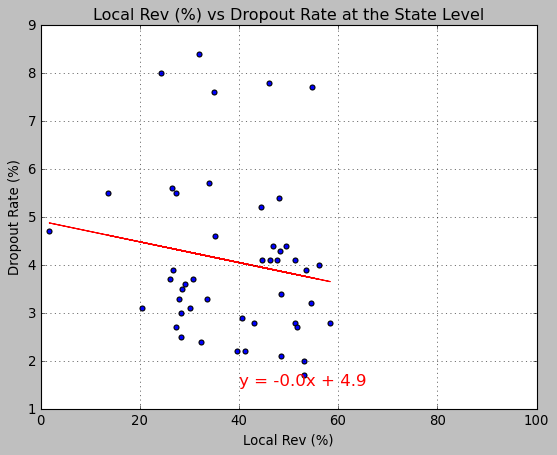

The correlation between both factors is -0.1615


In [60]:
# Other Revenue vs Dropout Rate
x_values = summary_pct['Local Rev (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Local Rev (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Local Rev (%) vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

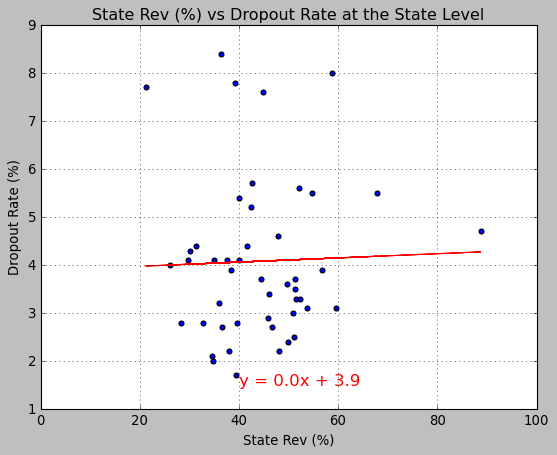

The correlation between both factors is 0.0306


In [61]:
# Local Rev (%) vs Dropout Rate
x_values = summary_pct['State Rev (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('State Rev (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('State Rev (%) vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

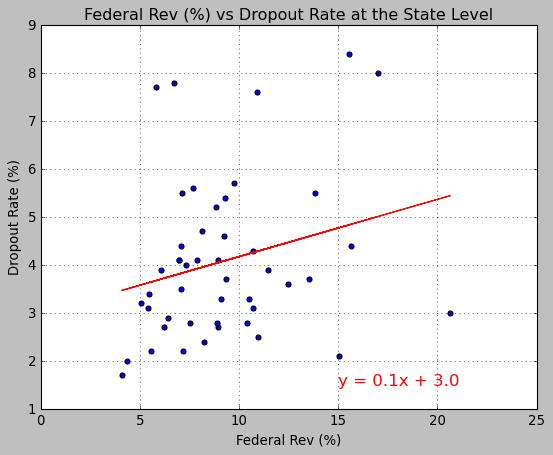

The correlation between both factors is 0.2506


In [62]:
# Federal Rev (%) vs Dropout Rate
x_values = summary_pct['Federal Rev (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,1.5),fontsize=15,color="red")
plt.xlabel('Federal Rev (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Federal Rev (%) vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 25)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

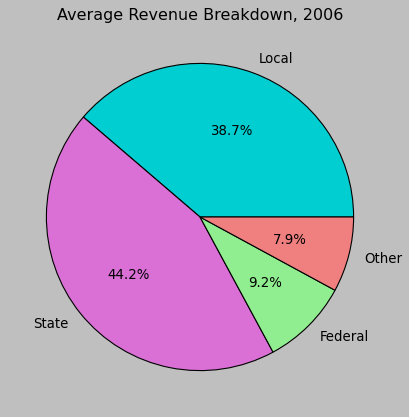

In [73]:
local = summary_pct['Local Rev (%)'].mean()
state = summary_pct['State Rev (%)'].mean()
federal = summary_pct['Federal Rev (%)'].mean()
other = summary_pct['Other Rev (%)'].mean()

plt.pie(x = [local, state, federal, other], labels = ['Local', 'State', 'Federal', 'Other'],
        autopct='%1.1f%%', colors = ['darkturquoise', 'orchid', 'lightgreen', 'lightcoral'])
plt.title('Average Revenue Breakdown, 2006')
plt.show()

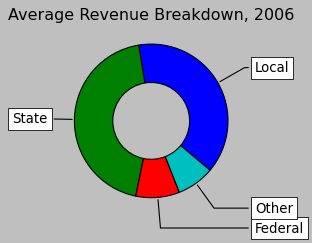

In [72]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["Local",
          "State",
          "Federal",
          "Other"]

data = [local, state, federal, other]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Average Revenue Breakdown, 2006")

plt.show()